# Clustering 

Bo Coleman

## 1. DBSCAN
Using DBSCAN iterate (for-loop) through different values of `min_samples` (1 to 10) and `epsilon` (.05 to .5, in steps of .01)  to find clusters in the road-data used in the Lesson and calculate the Silohouette Coeff for `min_samples` and `epsilon`. Plot **_one_** line plot with the multiple lines generated from the min_samples and epsilon values. Use a 2D array to store the SilCoeff values, one dimension represents `min_samples`, the other represents epsilon.

Expecting a plot of `epsilon` vs `sil_score`.

In [38]:
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
plt.rcParams['font.size'] = 10

In [16]:
# import data
X = pd.read_csv(r'C:\Users\17036\Desktop\mlnn\data\3D_spatial_network.txt.gz', header=None, names=['osm', 'lat','lon','alt'])
X = X.drop(['osm'], axis=1).sample(10000)

scaler = StandardScaler()
XX = scaler.fit_transform(X)
XX

array([[ 0.90458696,  1.84712255, -0.40373947],
       [ 1.20942691,  1.07617263,  2.3005602 ],
       [ 0.0237346 , -0.16390677, -0.44731867],
       ...,
       [-0.25964247, -0.6341254 , -1.11096584],
       [-0.2060831 , -1.34825954,  1.00557313],
       [ 0.46003938,  0.7866829 ,  0.51665616]])

In [9]:
min_samples = np.arange(1, 11, 1)
epsilons = np.arange(0.05, 0.51, 0.01)

In [21]:
all_scores = []
for min_sample in min_samples:
    scores = []
    for epsilon in epsilons:
        dbscan = DBSCAN(eps=epsilon, min_samples=min_sample)
        clus = dbscan.fit_predict(XX)
        
        # calculate silouette score here
        score = metrics.silhouette_score(XX, clus)
        
        scores.append(score)
        
    all_scores.append(scores)

<IPython.core.display.Javascript object>


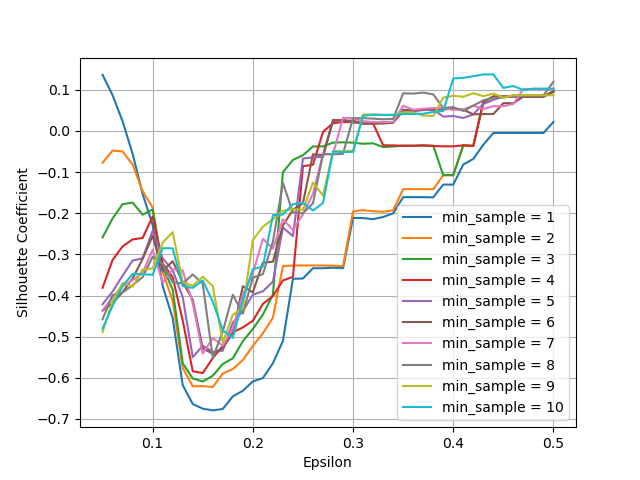

In [39]:
# graph of epsilon vs sil_score, different line for each min_sample
plt.figure()
for idx, val in enumerate(min_samples):
    plt.plot(epsilons, all_scores[idx], label = ('min_sample = ' + str(val)))
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.legend()
plt.show()

## 2. Clustering your own data
Using your own data, find relevant clusters/groups within your data (repeat the above). If your data is labeled with a class that you are attempting to predict, be sure to not use it in training and clustering. 

You may use the labels to compare with predictions to show how well the clustering performed using one of the clustering metrics (http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation). 

If you don't have labels, use the silhouette coefficient to show performance. Find the optimal fit for your data but you don't need to be as exhaustive as above.

Additionally, show the clusters in 2D or 3D plots. 

As a bonus, try using PCA first to condense your data from N columns to less than N.

Two items are expected: 
- Metric Evaluation Plot (like in 1.)
- Plots of the clustered data

### Predict Presidential Preference from race, income, sex, and urban

I will be using the 2020 ANES study; specifically, the cleaned dataset that I created in the 'Unleashing Open Data with Python' course last semester.  In order to minimize the amount of code in this jupyter notebook, I left all of the cleaning/recoding code in the previous jupyter notebook, exported the cleaned dataframe to a .csv, and will import the cleaned .csv below.

In [40]:
# read in dataset
ANES = pd.read_csv(r'C:\Users\17036\Desktop\mlnn-personal\Week-8\ANES_2020.csv', index_col=0)
ANES.head()

race   social_class    income  president     sex       urban
0         Hispanic   Middle class  249999.0        0.0    Male        City
1            White   Middle class  109999.0        1.0  Female      Suburb
2            Asian   Middle class   39999.0        1.0    Male  Small town
3  Native American    Lower class  300000.0        0.0    Male        City
4            White  Working class   19999.0        1.0  Female      Suburb

In [50]:
# transform columns
from sklearn import preprocessing, decomposition
ANES_clean = ANES.copy()
ANES_clean = ANES_clean.drop('social_class', axis=1)
non_numerical_cols = ['race', 'sex', 'urban']

ord_enc = preprocessing.OrdinalEncoder()
ANES_clean[non_numerical_cols] = ord_enc.fit_transform(ANES_clean[non_numerical_cols])
ANES_clean

race    income  president  sex  urban
0      2.0  249999.0        0.0  1.0    0.0
1      5.0  109999.0        1.0  0.0    3.0
2      0.0   39999.0        1.0  1.0    2.0
3      4.0  300000.0        0.0  1.0    0.0
4      5.0   19999.0        1.0  0.0    3.0
...    ...       ...        ...  ...    ...
6166   5.0   44999.0        0.0  0.0    2.0
6167   5.0  149999.0        0.0  0.0    0.0
6168   2.0   99999.0        1.0  1.0    3.0
6169   5.0   79999.0        0.0  0.0    1.0
6170   0.0   89999.0        1.0  0.0    2.0

[6171 rows x 5 columns]

In [56]:
# reduce from 4-dimensions to 3 (PCA)
pca = decomposition.PCA(n_components=3)
ANES_pca = pca.fit_transform(ANES_clean.drop('president', axis=1))
ANES_pca

array([[ 1.53999290e+05,  2.67204315e+00, -1.40537417e+00],
       [ 1.39992902e+04, -1.05803356e+00,  1.24212525e+00],
       [-5.60007098e+04,  3.90297288e+00,  1.24926373e+00],
       ...,
       [ 3.99929023e+03,  1.86823391e+00,  1.78593669e+00],
       [-1.60007098e+04, -7.60697088e-01, -6.78936957e-01],
       [-6.00070978e+03,  4.00306273e+00,  1.17049777e+00]])

In [83]:
min_samples = np.arange(7, 15, 1)
epsilons = np.arange(0.05, 0.45, 0.05)

In [101]:
all_scores = []
all_nclusters = []
all_noutliers = []
for min_sample in min_samples:
    scores = []
    nclusters = []
    noutliers = []
    for epsilon in epsilons:
        dbscan = DBSCAN(eps=epsilon, min_samples=min_sample)
        clus = dbscan.fit_predict(ANES_pca)
        
        # calculate alignment between clusters and presidential preference
        model_rand_idx = metrics.rand_score(clus, ANES_clean.president)
        
        # calculate number of clusters and number of outliers
        ncluster = len(pd.value_counts(clus))
        noutlier = sum(clus == -1)
        
        scores.append(model_rand_idx)
        nclusters.append(ncluster)
        noutliers.append(noutlier)
    all_scores.append(scores)
    all_nclusters.append(nclusters)
    all_noutliers.append(noutliers)

It is worth noting that the Rand Index is not "perfect" in the way it compares clusters to category assignments.  For example, the unajusted index would consider [1, 2, 3] to perfectly match [4, 5, 6] since none of the values share a common class.

For the purposes of this assignment, I will be looking for a high rand_index, a low number of clusters (since there are only 2 options for Presidential Preference), and a relatively low number of "unassigned" clusters - those points with a cluster value of -1 in the outputs of DBSCAN.

<IPython.core.display.Javascript object>


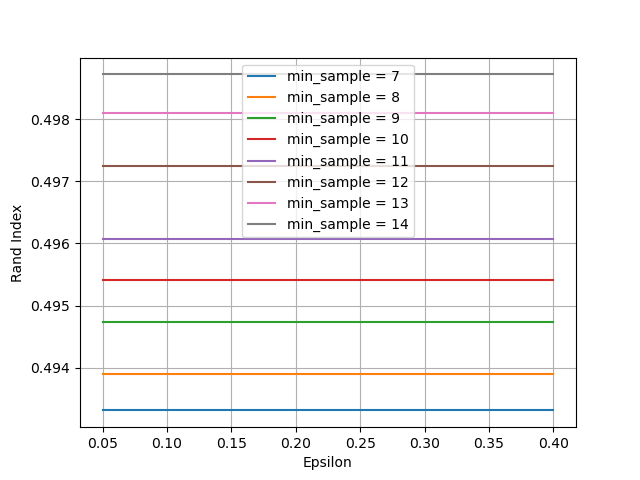

In [102]:
# graph of epsilon vs sil_score, different line for each min_sample
plt.figure()
for idx, val in enumerate(min_samples):
    plt.plot(epsilons, all_scores[idx], label = ('min_sample = ' + str(val)))
plt.xlabel('Epsilon')
plt.ylabel('Rand Index')
plt.grid(True)
plt.legend()
plt.show()

I also want to look at the number of distinct clusters in each DBSCAN run

<IPython.core.display.Javascript object>


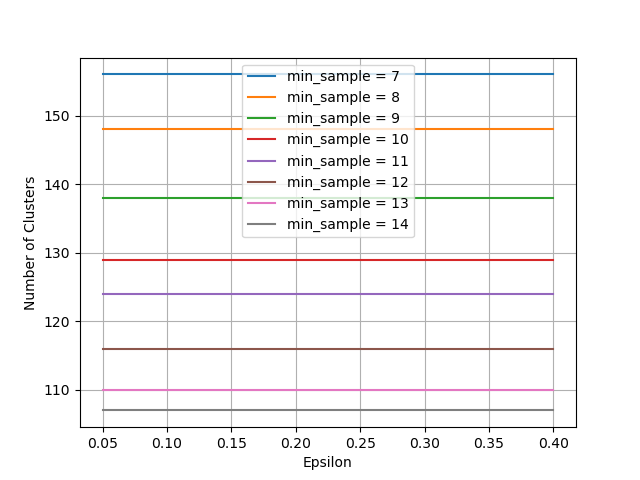

In [103]:
plt.figure()
for idx, val in enumerate(min_samples):
    plt.plot(epsilons, all_nclusters[idx], label = ('min_sample = ' + str(val)))
plt.xlabel('Epsilon')
plt.ylabel('Number of Clusters')
plt.grid(True)
plt.legend()
plt.show()

...and the number of outliers in each DBSCAN run

<IPython.core.display.Javascript object>


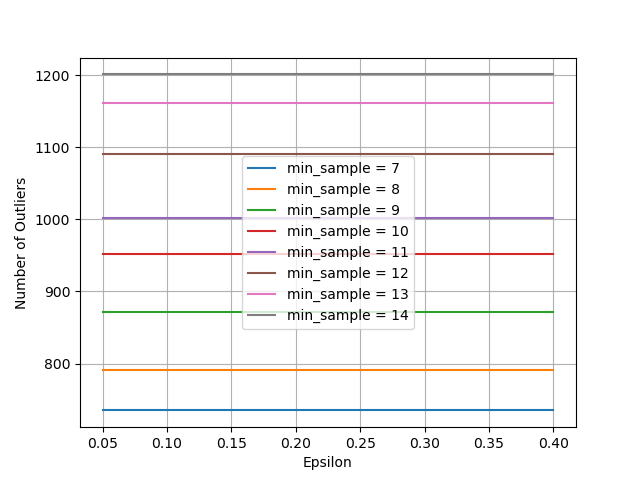

In [104]:
plt.figure()
for idx, val in enumerate(min_samples):
    plt.plot(epsilons, all_noutliers[idx], label = ('min_sample = ' + str(val)))
plt.xlabel('Epsilon')
plt.ylabel('Number of Outliers')
plt.grid(True)
plt.legend()
plt.show()

It is clear that as the number of clusters decreases, the number of outliers increases which is not ideal in this case since we are looking for closer to 2 clusters (not in the 100s) and as few outliers as possible.

I am going to select a DBSCAN clustering output with epsilon = 0.10 and min_sample = 11

In [106]:
dbscan = DBSCAN(eps=0.10, min_samples=11)
clus = dbscan.fit_predict(ANES_pca)

<IPython.core.display.Javascript object>


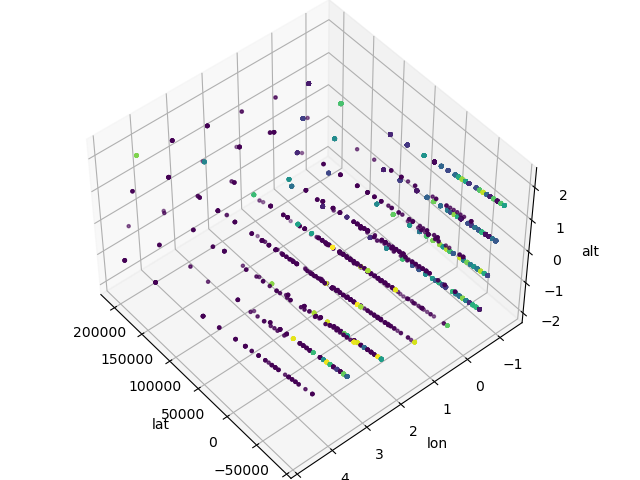

C:\Users\17036\AppData\Local\Temp/ipykernel_15540/4038950623.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)


In [107]:
fig = plt.figure()
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)

plt.cla()

ax.scatter(ANES_pca[:, 0], ANES_pca[:, 1], ANES_pca[:, 2], c=clus, s=5)

ax.set_xlabel('lat')
ax.set_ylabel('lon')
ax.set_zlabel('alt')
plt.show()

Let's attempt K-means clustering with N = 2 clusters

In [111]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, random_state=1)
km.fit(ANES_pca)

KMeans(n_clusters=2, random_state=1)

In [112]:
set(km.labels_)

{0, 1}

In [113]:
km.labels_

array([0, 1, 1, ..., 1, 1, 1])

In [115]:
metrics.rand_score(km.labels_, ANES_clean.president)

0.5004081148110824

K-means does provide for the highest (but just barely) Rand Index between the clusters and known values of Presidential Preference.  It may be a better algorithm when comparing between a known value of outcomes (2) and clustering approaches.